In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import re
from collections import Counter

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input/amazon-reviews-and-ai-narratives-dataset/complete_results.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/amazon-reviews-and-ai-narratives-dataset/complete_results.csv')

df.isnull().sum()
text_columns = [
    'original_review_text',
    'bart_summary',
    't5_summary',
    'raw_best_summary'
]

for col in text_columns:
    df[col] = df[col].fillna('')
def clean_price(price):
    if pd.isna(price):
        return np.nan
    price = str(price).replace('₹', '').replace(',', '').strip()
    return float(price)

df['discount_price'] = df['discount_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

def clean_price(price):
    if pd.isna(price):
        return np.nan
    price = str(price).replace('₹', '').replace(',', '').strip()
    return float(price)

df['discount_price'] = df['discount_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

import re

def clean_ratings_count(val):
    if pd.isna(val):
        return np.nan
    
    val = str(val)
    
    # Extract digits only
    numbers = re.findall(r'\d+', val)
    
    if numbers:
        return float(numbers[0])
    else:
        return np.nan


df['no_of_ratings'].head(10)

0        965
1    113,956
2     90,304
3     24,863
4    113,956
5        625
6    172,347
7     61,748
8     16,949
9     24,863
Name: no_of_ratings, dtype: object

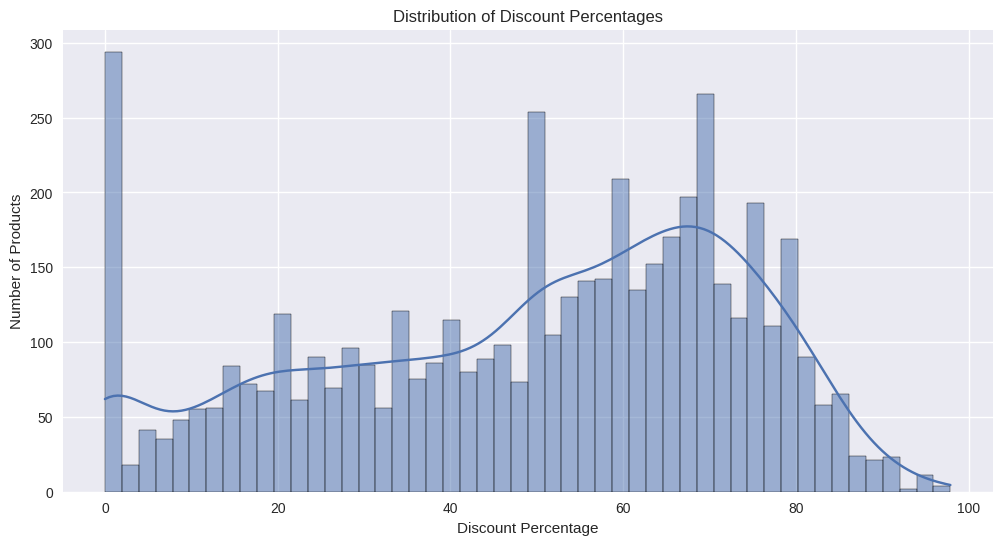

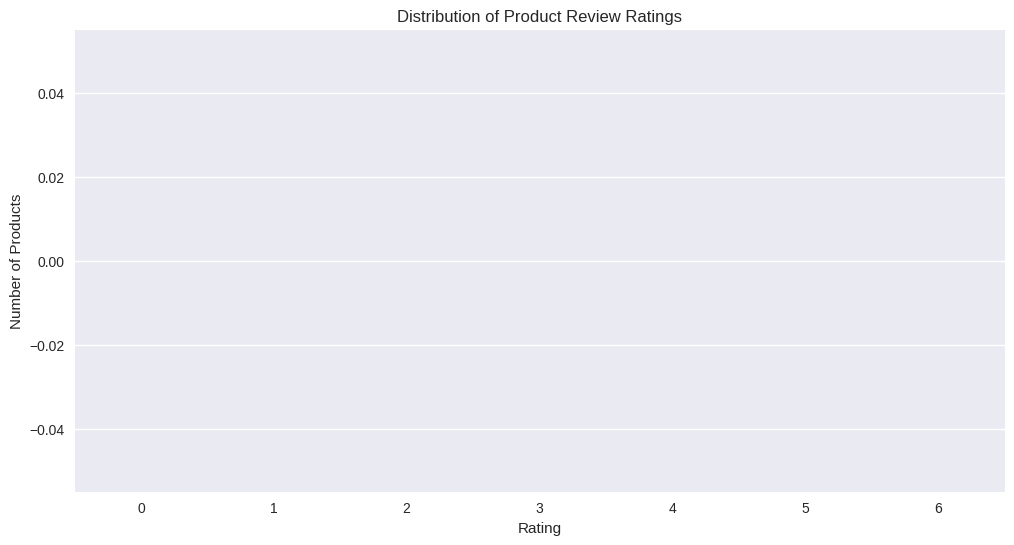

,review_rating,sentiment
0,NaN,Negative
1,NaN,Negative
2,NaN,Negative
3,NaN,Negative
4,NaN,Negative
...,...,...
5005,NaN,Negative
5006,NaN,Negative
5007,NaN,Negative
5008,NaN,Negative


In [31]:

df['no_of_ratings'] = df['no_of_ratings'].apply(clean_ratings_count)
df['no_of_ratings'].head(10)
df['discount_amount'] = df['actual_price'] - df['discount_price']

df['discount_amount'] = df['actual_price'] - df['discount_price']
df['discount_percentage'] = (df['discount_amount'] / df['actual_price']) * 100
df[['actual_price', 'discount_price', 'discount_percentage']].head()
df['discount_amount'] = df['discount_amount'].apply(lambda x: x if x > 0 else 0)
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x if x > 0 else 0)
sns.histplot(df['discount_percentage'], bins=50, kde=True)
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount Percentage")
plt.ylabel("Number of Products")
plt.show()
category_discount = (
    df.groupby('main_category')['discount_percentage']
      .mean()
      .sort_values(ascending=False)
)

category_discount.head(10)
df.head()
df[['name', 'main_category', 'actual_price', 'discount_price', 'discount_percentage']] \
    .sort_values(by='discount_percentage', ascending=False) \
    .head(10)
sns.countplot(x='review_rating', data=df)
plt.title("Distribution of Product Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()
df['review_rating'].describe()
df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')

df['review_rating'] = df['review_rating'].fillna(df['review_rating'].median())
def rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating >= 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['review_rating'].apply(rating_to_sentiment)
df[['review_rating', 'sentiment']].head(10000)